<a href="https://colab.research.google.com/github/RafaelNovais/Python/blob/master/Stress_Predict_Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Rafael Novais de Melo
2324-CT5170 Principles of Machine Learning
23113607


###Understanding the Dataset
For solving the problem of predicting stress levels, "Supervised Classification" is the appropriate machine learning category.
This choice is justified by the binary data. It allows us to make predictions using the training dataset and confirm their accuracy using the test dataset,
providing a quantitative estimate of stress levels and a more fine-grained understanding of stress.



###Data Exploration
Analyzing the distribution of data between training and testing sets is crucial. To determine whether the dataset is imbalanced, we can look at the proportion of each class.
Imbalanced datasets typically have one class significantly outnumbering the other, but in this case,
it doesn't qualify as imbalanced as the proportion falls within the range of low to moderate imbalances (less than 20%).
Data:
Class 0: 67.28%
Class 1: 32.72%
Test:
Class 0: 67.18%
Class 1: 32.82%
Train:
Class 0: 67.32%
Class 1: 32.68%



###Choosing an ML Package
To address the various tasks associated with machine learning and classification, we rely on different tools:
Pandas: It is used for reading and manipulating data in various formats, facilitating data conversion, cleaning, and organization.
Scikit-Learn: This library offers a wide range of classification algorithms, including Decision Trees, Random Forests, Support Vector Machines (SVM), and Linear Regression,
making it a valuable choice.
Matplotlib and Seaborn: These are used for data visualization and scientific plotting.
NumPy: It helps organize the data and perform mathematical operations.



###Data Pre-processing
Before applying machine learning algorithms, data pre-processing is essential. This involves removing empty rows, structuring the data in a dataframe,
and establishing a baseline for accuracy comparison. The baseline serves as a reference point, assuming all predictions are 1 (random chance).



###Algorithm Selection and Application
The base line accuracy = 0.3283347657291883

DecisionTreeClassifier: Initially, we set max_depth=5 to create a manageable visual representation. However, for improved precision and accuracy,
it's better to remove the max_depth constraint. We use the confusion matrix to assess correct and incorrect predictions, verify recall,
and calculate accuracy to compare with the baseline.
accuracy = 0.7107844589989035
precision = 0.559023430513325
recall =0.5642205975268526
confusion_matrix
[17733  4931]
[ 4828  6251]

Random Forest: Employed with 200 decision trees, as it outperformed single decision trees in precision.
accuracy = 0.7431170909521975
precision = 0.6317918443205423
recall = 0.5216174745013088
confusion_matrix
[19296  3368]
[ 5300  5779]

SVM: Unfortunately, SVM resulted in low accuracy and was not deemed trustworthy for this task.
accuracy = 0.6716652342708117
precision = 0
recall = 0
confusion_matrix
[22664     0]
[11079     0]


AdaBoostClassifier and K-Nearest Neighbors: Produced similar results, but with less precision compared to Random Forest.
AdaBoostClassifier
accuracy = 0.6812968615712889
precision = 0.5979505726341169
recall = 0.08953876703673616
confusion_matrix
[21997   667]
[10087   992]

K-Nearest Neighbors
accuracy = 0.7055981981448004
precision = 0.6212666807879687
recall = 0.26473508439389837
confusion_matrix
[20876  1788]
[ 8146  2933]



###Model Evaluation
Given the health context of the problem, precision is considered the best metric. After applying various classification algorithms and calculating precision metrics,
Random Forest emerged as the algorithm with the highest precision:
Random Forest Precision = 0.6318



###Comparative Analysis
Both models provide different results, with Random Forest achieving the highest precision. The strengths and weaknesses of each algorithm's performance are reflected upon,
taking into account factors like interpretability, accuracy, and the potential for overfitting or underfitting.
The ability of the models to effectively predict stress levels is assessed in line with the assignment's objectives.


"""



In [61]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from pandas.core.arrays.datetimelike import mode
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import graphviz
from scipy.stats import ttest_rel
from sklearn.model_selection import KFold


!pip install graphviz
!apt-get install graphviz



###Data Pre-processing
#data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data.csv")
#data = pd.DataFrame(data)
#data = data.dropna()
#dataTest = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
#dataTest = pd.DataFrame(dataTest)
#dataTest = dataTest.dropna()

#x_data = data[["HR","respr"]]
#y_data = data["Label"]
#x_test = dataTest[["HR","respr"]]
#y_test = dataTest["Label"]
#x_train = dataTrain[["HR","respr"]]
#y_train = dataTrain["Label"]


#Import the CSV Data and Cleaned
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
data = pd.DataFrame(data)
data = data.dropna()

#Split the Full data in Train and Test
x_train, x_test, y_train, y_test = train_test_split( data[["HR","respr"]] , data["Label"], test_size=0.20, random_state=10, stratify= data["Label"] )
#Check the split
print(data.shape)
print(x_train.shape)
print(x_test.shape)


###Data Exploration
#propor_data = y_data.value_counts()/len(x_data)
propor_test = y_test.value_counts()/len(x_test)
propor_train = y_train.value_counts()/len(x_train)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
(78729, 5)
(62983, 2)
(15746, 2)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
###BaseLine
base_line = np.ones(len(y_test))
base_line_accuracy = accuracy_score(y_test,base_line)
base_line_precission = precision_score(y_test,base_line)
print(base_line_precission)

0.32687666709005464
0.32687666709005464


0.6794106439730725 0.5549389567147613 0.09714396735962696 [[10198   401]
 [ 4647   500]] 0.16534391534391535


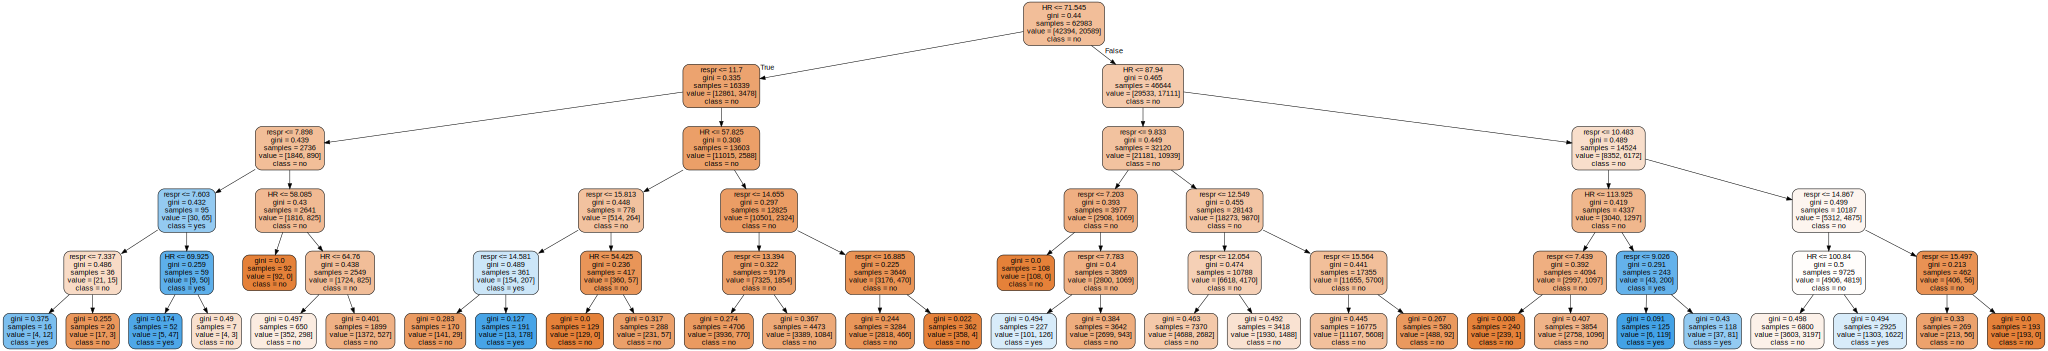

In [63]:

###Algorithm Selection and Application
##Decision Tree
model_tree = DecisionTreeClassifier( random_state=0, max_depth=5)
model_tree.fit(x_train,y_train)
predict_tree = model_tree.predict(x_test)

###Model Evaluation
accuracy_tree = accuracy_score(y_test,predict_tree)
precision_tree = precision_score(y_test,predict_tree)
confusion_matrix_tree = confusion_matrix(y_test,predict_tree)
recall_tree = recall_score(y_test,predict_tree)
f1_tree = f1_score(y_test,predict_tree)
print(accuracy_tree, precision_tree,recall_tree ,confusion_matrix_tree, f1_tree)
#Print Graphic
dot_data = export_graphviz(model_tree, feature_names=x_train.columns, class_names=["no", "yes"] ,filled=True, rounded=True)
graphviz.Source(dot_data)


In [64]:
###Random Forest
model_random = RandomForestClassifier(n_estimators=200 ,random_state=0)
model_random.fit(x_train,y_train)
predict_random = model_random.predict(x_test)

###Model Evaluation
accuracy_random = accuracy_score(y_test,predict_random)
precision_random = precision_score(y_test,predict_random)
confusion_matrix_random = confusion_matrix(y_test,predict_random)
recall_random = recall_score(y_test,predict_random)
f1_random = f1_score(y_test,predict_random)
print(accuracy_random, precision_random,recall_random ,confusion_matrix_random,f1_random)

0.7342817223421821 0.6144521036367958 0.5022343112492714 [[8977 1622]
 [2562 2585]] 0.5527047252512294


In [65]:
##Support Vector Machine (SVM)
model_svm = LinearSVC(random_state=0)
model_svm.fit(x_train,y_train)
predict_svm = model_svm.predict(x_test)

###Model Evaluation
accuracy_svm = accuracy_score(y_test,predict_svm)
precision_svm = precision_score(y_test,predict_svm)
confusion_matrix_svm = confusion_matrix(y_test,predict_svm)
recall_svm = recall_score(y_test,predict_svm)
f1_svm = f1_score(y_test,predict_svm)
print(accuracy_svm, precision_svm,recall_svm ,confusion_matrix_svm, f1_svm)

##Print Graphic
##sns.countplot(x="HR",y="respr",col="Label", hue="Label",data=data)

0.6731233329099454 0.0 0.0 [[10599     0]
 [ 5147     0]] 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
##AdaBoost
model_boost = AdaBoostClassifier(n_estimators=200 ,random_state=0)
model_boost.fit(x_train,y_train)
predict_boost = model_boost.predict(x_test)

###Model Evaluation
accuracy_boost = accuracy_score(y_test,predict_boost)
precision_boost = precision_score(y_test,predict_boost)
confusion_matrix_boost = confusion_matrix(y_test,predict_boost)
recall_boost = recall_score(y_test,predict_boost)
f1_boost =  f1_score(y_test,predict_boost)
print(accuracy_boost, precision_boost,recall_boost ,confusion_matrix_boost,f1_boost)

0.6782039883144926 0.5586510263929618 0.07402370312803574 [[10298   301]
 [ 4766   381]] 0.1307256819351518


In [68]:
##K-Nearest Neighbors
model_knn = KNeighborsClassifier(metric='euclidean', n_neighbors=100)
model_knn.fit(x_train,y_train)
predict_knn = model_knn.predict(x_test)

###Model Evaluation
accuracy_knn = accuracy_score(y_test,predict_knn)
precision_knn = precision_score(y_test,predict_knn)
confusion_matrix_knn = confusion_matrix(y_test,predict_knn)
recall_knn = recall_score(y_test,predict_knn)
f1_knn = f1_score(y_test,predict_knn)
print(accuracy_knn, precision_knn,recall_knn ,confusion_matrix_knn,f1_knn)


0.6992252000508066 0.5947441217150761 0.2506314357878376 [[9720  879]
 [3857 1290]] 0.35265172225259706


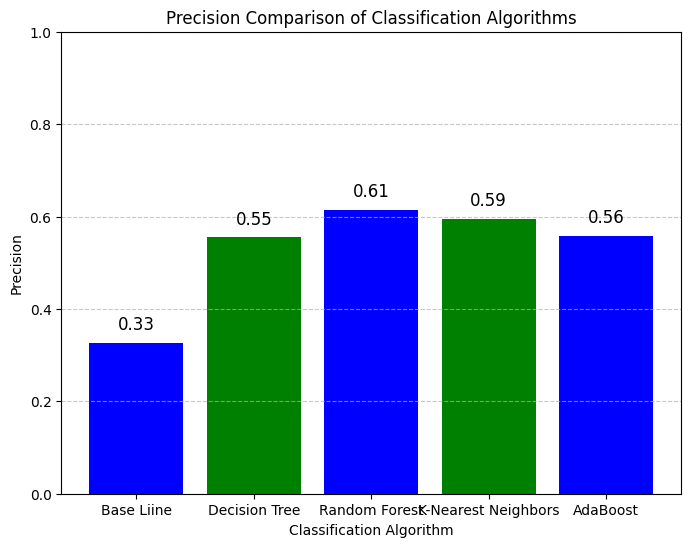

In [10]:
##Compare the precison
algorithms = ["Base Liine","Decision Tree", "Random Forest", "K-Nearest Neighbors", "AdaBoost"]
precision_scores = [base_line_precission, precision_tree, precision_random, precision_knn, precision_boost]
plt.figure(figsize=(10, 6))
plt.bar(algorithms, precision_scores, color=['blue', 'green'])
plt.xlabel("Classification Algorithm")
plt.ylabel("Precision")
plt.title("Precision Comparison of Classification Algorithms")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, score in enumerate(precision_scores):
    plt.text(i, score + 0.02, f"{score:.2f}", ha='center', va='bottom', fontsize=12)
plt.show()



In [60]:
#T-Test Compare Base line Precision
precision_scores = [precision_tree, precision_random, precision_knn, precision_boost]
print(precision_scores)
significant_results = []
p=0.05 # Significantly 95%
for precision in precision_scores:
    p_value = ttest_rel([base_line_precission], [precision]).pvalue
    if p_value < p:
        result = "Significantly"
    else:
        result = "Not Significantly"
    significant_results.append(result)
classifier_labels = ["Decision Tree", "Random Forest", "K-NN", "Boosting"]
for i, classifier in enumerate(classifier_labels):
    print(f"{classifier} is {significant_results[i]} compared to the baseline.")


[0.5549389567147613, 0.6144521036367958, 0.5947441217150761, 0.5586510263929618]
Decision Tree is Not Significantly Better compared to the baseline.
Random Forest is Not Significantly Better compared to the baseline.
K-NN is Not Significantly Better compared to the baseline.
Boosting is Not Significantly Better compared to the baseline.


Classifier: Decision Tree
Average Accuracy: 0.7035550159408226
Average Precision: 0.5461237391259665
Average Recall: 0.5513715643471814
Average F1 Score: 0.5485893006164984




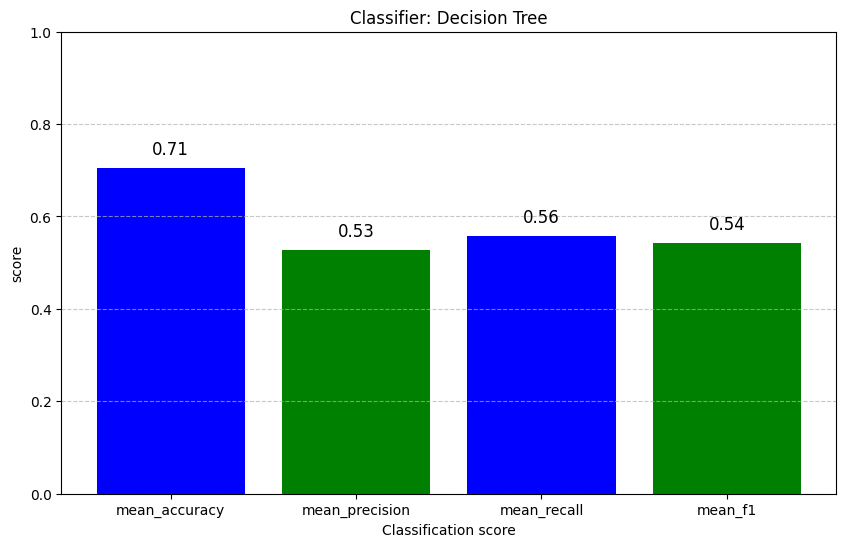

Classifier: Random Forest
Average Accuracy: 0.7354048647299992
Average Precision: 0.6180156223315565
Average Recall: 0.4990973791559966
Average F1 Score: 0.5521417121518537




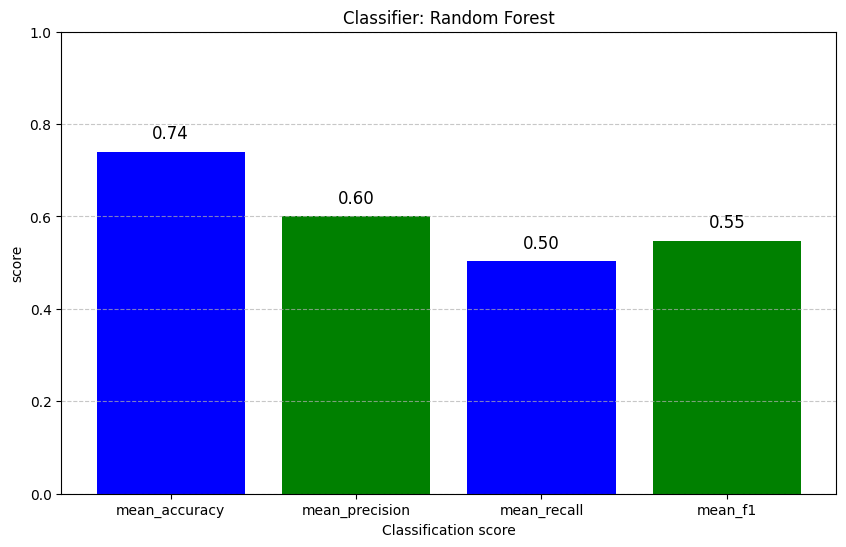

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-pa

Classifier: SVM
Average Accuracy: 0.4981050765869826
Average Precision: 0.16248945959896063
Average Recall: 0.5
Average F1 Score: 0.24523546255007314




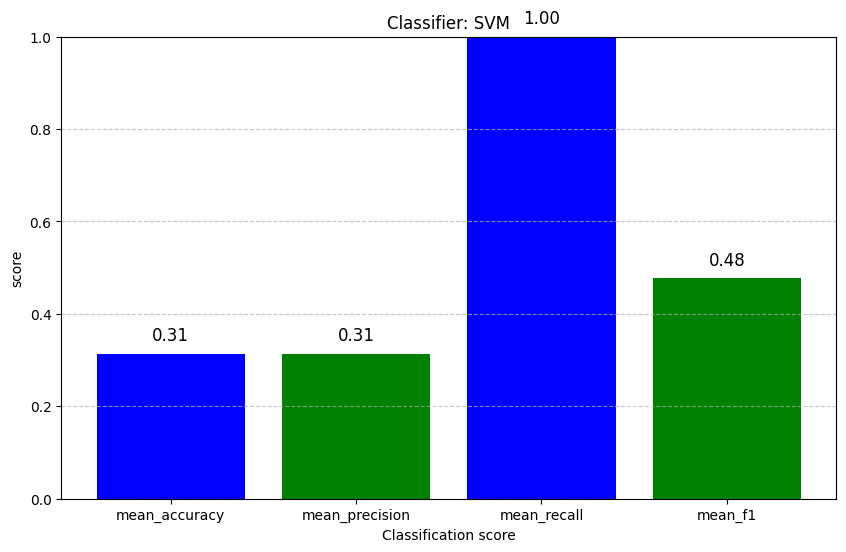

Classifier: AdaBoost
Average Accuracy: 0.6791833158554555
Average Precision: 0.5973752279143631
Average Recall: 0.05721274860253982
Average F1 Score: 0.10427287795693244




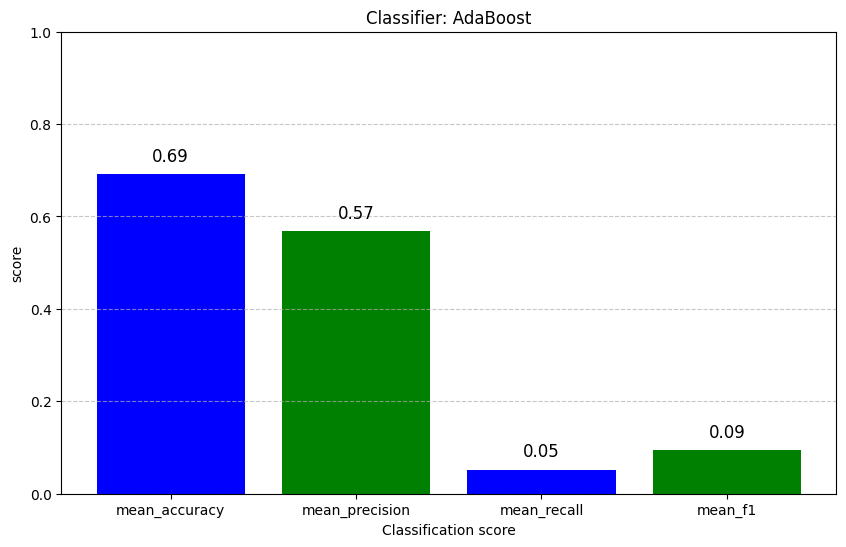

Classifier: K-NN
Average Accuracy: 0.7110490729498766
Average Precision: 0.5714632133965131
Average Recall: 0.4645981437266813
Average F1 Score: 0.5123966420893945




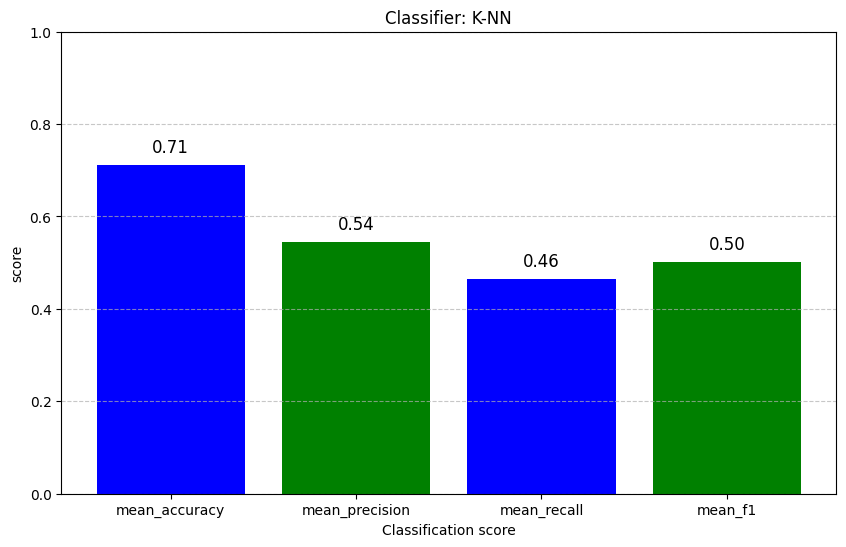

In [72]:
#KFold with the Classifier was done before
#Suggestion of evolution : create a function for each classifier, and just call the function and compare the score per classifier
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), LinearSVC(), AdaBoostClassifier(), KNeighborsClassifier()]
classifier_names = ["Decision Tree", "Random Forest", "SVM", "AdaBoost", "K-NN"]

for classifier, classifier_name in zip(classifiers, classifier_names):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(x_train):
        X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[test_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        classifier.fit(X_train_fold, y_train_fold)
        y_pred = classifier.predict(X_val_fold)

        accuracy = accuracy_score(y_val_fold, y_pred)
        precision = precision_score(y_val_fold, y_pred)
        recall = recall_score(y_val_fold, y_pred)
        f1 = f1_score(y_val_fold, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    print(f"Classifier: {classifier_name}")
    print("Average Accuracy:", sum(accuracy_scores) / len(accuracy_scores))
    print("Average Precision:", sum(precision_scores) / len(precision_scores))
    print("Average Recall:", sum(recall_scores) / len(recall_scores))
    print("Average F1 Score:", sum(f1_scores) / len(f1_scores))
    print("\n")

    mean_accuracy = accuracy_score(y_val_fold, y_pred)
    mean_precision = precision_score(y_val_fold, y_pred)
    mean_recall = recall_score(y_val_fold, y_pred)
    mean_f1 = f1_score(y_val_fold, y_pred)

    algorithms = ["mean_accuracy", "mean_precision", "mean_recall", "mean_f1"]
    precision_scores = [ mean_accuracy, mean_precision, mean_recall, mean_f1]
    plt.figure(figsize=(10, 6))
    plt.bar(algorithms, precision_scores, color=['blue', 'green'])
    plt.xlabel("Classification score")
    plt.ylabel("score")
    plt.title((f"Classifier: {classifier_name}"))
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for i, score in enumerate(precision_scores):
        plt.text(i, score + 0.02, f"{score:.2f}", ha='center', va='bottom', fontsize=12)
    plt.show()




